In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
df = pd.read_csv("datas/headbrain.csv")

In [3]:
print(df.size)
print(df.shape)
df.head()

948
(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
X_train = df['Head Size(cm^3)'].values
y_train = df['Brain Weight(grams)'].values

/home/jenly/Anaconda/envs/MachineLearning/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

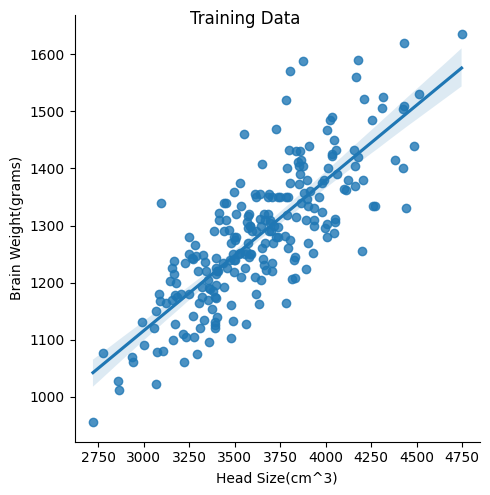

In [5]:
plt.figure()
ax=sns.lmplot(data=df,x='Head Size(cm^3)',y='Brain Weight(grams)')
ax.fig.suptitle('Training Data')  
plt.show()

# Model From Scratch

## Fitting

Fitting using ORDINARY LEAST SQUARES

In [7]:
def fit(X,y):
    
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    
    n = X.shape[0]
    
    x_mean_diff = X - x_mean
    y_mean_diff = y - y_mean

    numerator = np.dot(x_mean_diff,y_mean_diff)
    denominator = np.sum(np.square(x_mean_diff))
    
    m = numerator/denominator
    b = y_mean - (m * x_mean)
    return m,b
    

In [9]:
m,b = fit(X_train,y_train)

## Predicting 

In [8]:
def predict(X,m,b):
    return  m * X + b

## Testing Data 

In [10]:
max_x = np.max(X_train) + 100
min_x = np.min(X_train) - 100

X_test = np.linspace(min_x, max_x, 1000)

In [11]:
predictions = predict(X_test,m,b)

## Plotting 

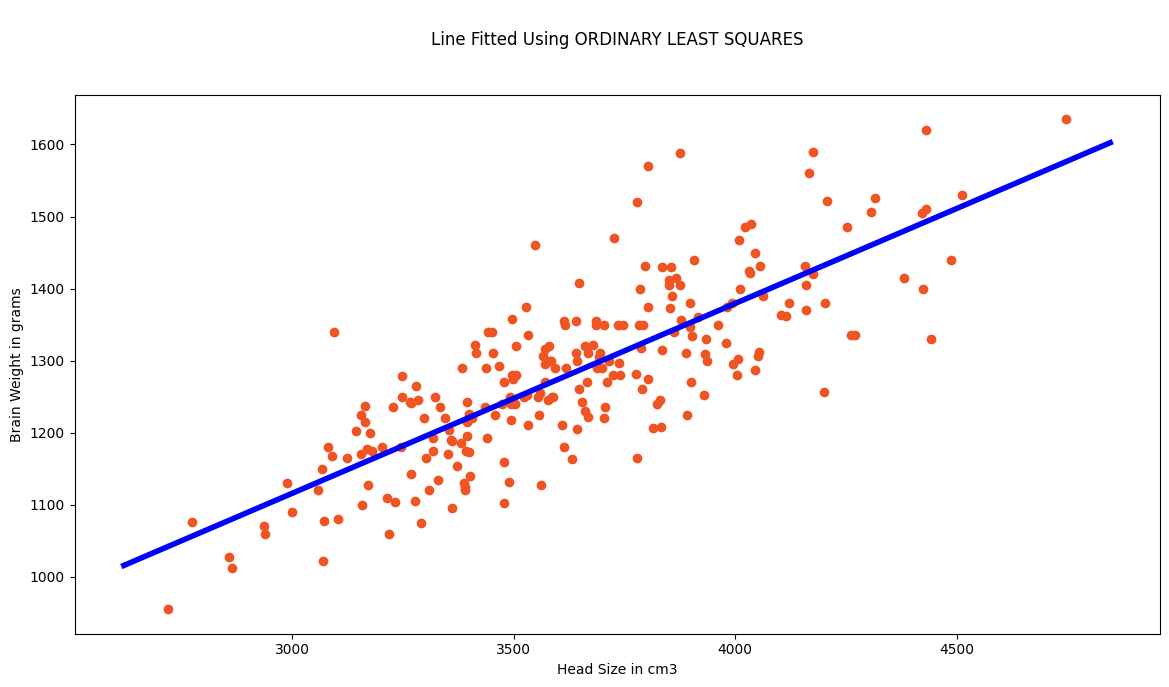

In [27]:
def plotData(X_train,X_test,predictions,title):
    plt.figure(figsize=(14,7))
    plt.plot(X_test, predictions, color='blue',linewidth=4, label='Regression Line')
    plt.scatter(X_train, y_train, c='#ef5423', label='Scatter Plot')
    
    plt.title(f"\nLine Fitted Using {title}\n\n")
    plt.xlabel('Head Size in cm3')
    plt.ylabel('Brain Weight in grams')


plotData(X_train,X_test,predictions,"ORDINARY LEAST SQUARES")

## Model Evaluation

### Root Mean Squared Error

In [13]:
def rmse(actual_value,predicted_value):

    return np.sqrt(np.sum(np.square(predicted_value - actual_value)))/len(actual_value)
    

### R2 Score

R-squared measures how close the data points are to the fitted regression line. If R-squared is close to 1, it means that a large portion of the variability in the dependent variable is explained by the regression model. If R-squared is close to 0, the model is not effectively capturing the variability in the data.

In [32]:
def r2_score(actual_value,predicted_value):
    ss_tot = np.sum((actual_value - np.mean(actual_value)) ** 2)
    ss_res = np.sum((actual_value - predicted_value) ** 2)

    r2 = abs(1 - (ss_res / ss_tot))
    return r2

In [37]:
print(f"Root Mean Squared Error : {rmse(y_train,predict(y_train,m,b))}")
print(f"R2-Score  : {r2_score(X_test,predictions)}")

Root Mean Squared Error : 40.639535170640976
R2-Score  : 13.73590492331755


# Using Scikit Learn

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Fitting

In [18]:
n = len(X_train)
x_train = X_train.reshape((n, 1))
reg = LinearRegression()
reg = reg.fit(x_train, y_train)

In [25]:
n = len(X_test)
prediction_1 = reg.predict(X_test.reshape(n,1))

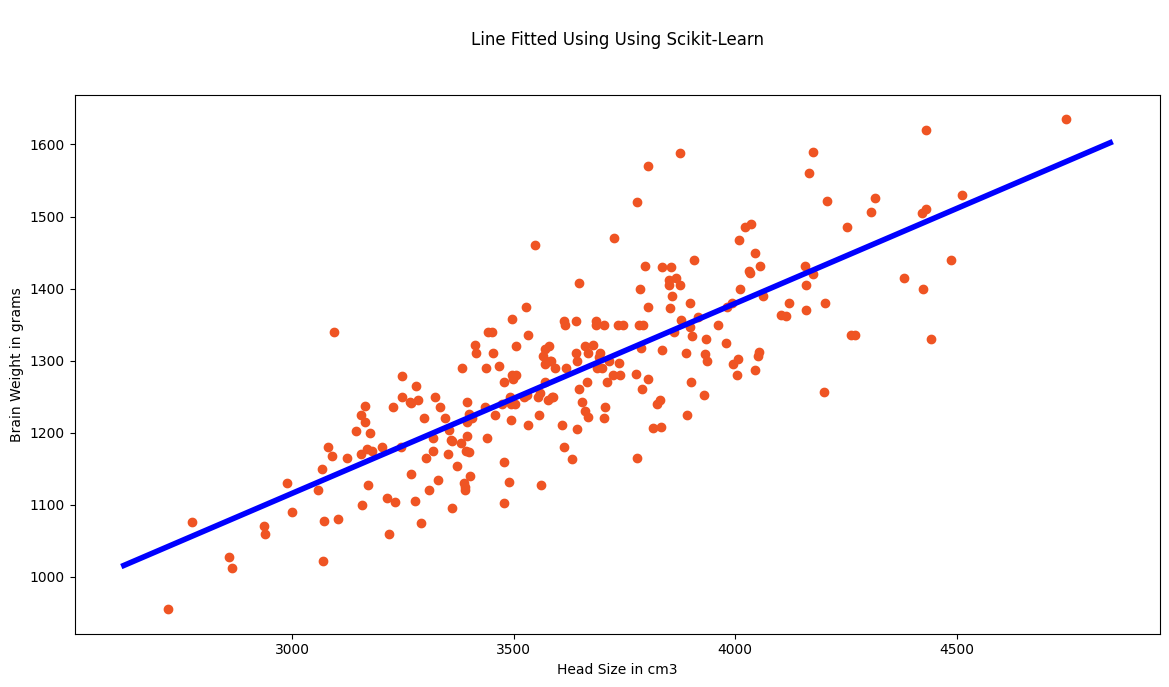

In [29]:
plotData(X_train,X_test,prediction_1,"Using Scikit-Learn")

In [30]:
reg.score(x_train,y_train)

0.639311719957

In [35]:
mse = mean_squared_error(y_train,reg.predict(x_train))
print(np.sqrt(mse))

72.1206213783709
